# Build your Own ChatGPT

Submitted by

Sonit Nitin Patil
bm23btech11023

## 1. Loading the given book and text processing it

In [1]:
import re
try:
    with open('book.txt', 'r', encoding='utf-8') as file:
        text = file.read().lower()
except UnicodeDecodeError:
    print("Error: Unable to decode file. Please check the file's encoding.")

words = re.findall(r'\b\w+', text)


In [2]:
print(words[0:300])

['the', 'mahabharata', 'a', 'tale', 'of', 'krishna', 'dwaipayana', 'vyasa', 'adi', 'parva', 'translators', 'preface', 'section', '1', 'section', '2', 'paushya', 'parva', 'pauloma', 'parva', 'astika', 'parva', 'adivansavatarana', 'parva', 'sambhava', 'parva', 'jatugriha', 'parva', 'hidimva', 'vadha', 'parva', 'vaka', 'vadha', 'parva', 'chaitraratha', 'parva', 'swayamvara', 'parva', 'vaivahika', 'parva', 'viduragamana', 'parva', 'rajya', 'labha', 'parva', 'arjuna', 'vanavasa', 'parva', 'subhadra', 'harana', 'parva', 'haranaharana', 'parva', 'khandava', 'daha', 'parva', 'translators', 'preface', 'the', 'object', 'of', 'a', 'translator', 'should', 'ever', 'be', 'to', 'hold', 'the', 'mirror', 'upto', 'his', 'author', 'that', 'being', 'so', 'his', 'chief', 'duty', 'is', 'to', 'represent', 'so', 'far', 'as', 'practicable', 'the', 'manner', 'in', 'which', 'his', 'author', 's', 'ideas', 'have', 'been', 'expressed', 'retaining', 'if', 'possible', 'at', 'the', 'sacrifice', 'of', 'idiom', 'and', '

In [3]:
from collections import Counter

In [4]:
all_word_count = Counter(words)

In [5]:
for i,j in zip(all_word_count.keys(), all_word_count.values()):
    print (i," -",j)

the  - 174307
mahabharata  - 50
a  - 30521
tale  - 44
of  - 134578
krishna  - 1941
dwaipayana  - 85
vyasa  - 487
adi  - 39
parva  - 335
translators  - 50
preface  - 6
section  - 2430
1  - 1886
2  - 951
paushya  - 22
pauloma  - 18
astika  - 89
adivansavatarana  - 3
sambhava  - 6
jatugriha  - 2
hidimva  - 112
vadha  - 8
vaka  - 58
chaitraratha  - 7
swayamvara  - 44
vaivahika  - 3
viduragamana  - 3
rajya  - 2
labha  - 2
arjuna  - 2922
vanavasa  - 2
subhadra  - 259
harana  - 10
haranaharana  - 2
khandava  - 82
daha  - 3
object  - 762
translator  - 113
should  - 6005
ever  - 1211
be  - 13080
to  - 45985
hold  - 159
mirror  - 23
upto  - 3
his  - 23726
author  - 35
that  - 49291
being  - 3168
so  - 3160
chief  - 1277
duty  - 650
is  - 31958
represent  - 56
far  - 206
as  - 15602
practicable  - 4
manner  - 328
in  - 44590
which  - 7213
s  - 11784
ideas  - 21
have  - 7849
been  - 5393
expressed  - 50
retaining  - 9
if  - 3950
possible  - 68
at  - 7886
sacrifice  - 1753
idiom  - 2
and  - 98107
t

In [6]:
print(len(all_word_count))
print(len(words))

32609
2565503


In [7]:
print(all_word_count['?'], " ", all_word_count['.'], " ", all_word_count[' '])

0   0   0


In [8]:
print("Probability of getting a Unique Word: ", len(all_word_count)/len(words))

Probability of getting a Unique Word:  0.012710567869146908


## 2. Computing Probabilities

### A. Calculating probability of each word

In [9]:
prob_each_word = {key: value / len(words) for key, value in all_word_count.items()}

In [10]:
for i,j in zip(prob_each_word.keys(), prob_each_word.values()):
    print (i," -",j)

the  - 0.06794262177826337
mahabharata  - 1.948935549870727e-05
a  - 0.011896692383520893
tale  - 1.71506328388624e-05
of  - 0.052456769686100545
krishna  - 0.0007565767804598163
dwaipayana  - 3.313190434780236e-05
vyasa  - 0.00018982632255740882
adi  - 1.520169728899167e-05
parva  - 0.00013057868184133872
translators  - 1.948935549870727e-05
preface  - 2.3387226598448725e-06
section  - 0.0009471826772371733
1  - 0.0007351384894112383
2  - 0.0003706875415854123
paushya  - 8.5753164194312e-06
pauloma  - 7.016167979534617e-06
astika  - 3.469105278769894e-05
adivansavatarana  - 1.1693613299224362e-06
sambhava  - 2.3387226598448725e-06
jatugriha  - 7.795742199482909e-07
hidimva  - 4.365615631710429e-05
vadha  - 3.1182968797931634e-06
vaka  - 2.2607652378500436e-05
chaitraratha  - 2.728509769819018e-06
swayamvara  - 1.71506328388624e-05
vaivahika  - 1.1693613299224362e-06
viduragamana  - 1.1693613299224362e-06
rajya  - 7.795742199482909e-07
labha  - 7.795742199482909e-07
arjuna  - 0.0011389

In [11]:
unique_words, unique_words_prob = list(prob_each_word.keys()), list(prob_each_word.values())

What can happen is Conditional prob can be 0. Rather than them being zero let us say that their cond prob is 0.001

In [12]:
conditional_probs = []

In [13]:
from math import comb

In [14]:
def count_contiguous_combinations(n, r):
    if r > n or r <= 0:
        return 0
    return n - r + 1

In [15]:
'''
for n in range(2, 7, 1): #n grams setter 2 gram to 6 gram string
    ngram_prob = dict()
    total_ngrams = count_contiguous_combinations(len(unique_words), n)
    for i in range(n, len(unique_words)+1, 1): #Taking a conditional n|n-1 (n gram) string
        condition = unique_words[i-1] + "|" + "".join(unique_words[i-n: i-1: 1])
        
        if(condition in ngram_prob.keys()):
            continue
        else:
            pass  
        n_gram_count = 0
        
        for j in range(n-1, len(unique_words), 1): #Iterating throughout text file to find repeated occurences
            cond = unique_words[j] + "|" + "".join(unique_words[j-n+1: j: 1])
            if (cond == condition):
                n_gram_count+=1
            else:
                pass

        prob = n_gram_count/total_ngrams
        ngram_prob[condition] = prob

    conditional_probs.append(ngram_prob)
            
            
'''     
    
        
        

'\nfor n in range(2, 7, 1): #n grams setter 2 gram to 6 gram string\n    ngram_prob = dict()\n    total_ngrams = count_contiguous_combinations(len(unique_words), n)\n    for i in range(n, len(unique_words)+1, 1): #Taking a conditional n|n-1 (n gram) string\n        condition = unique_words[i-1] + "|" + "".join(unique_words[i-n: i-1: 1])\n        \n        if(condition in ngram_prob.keys()):\n            continue\n        else:\n            pass  \n        n_gram_count = 0\n        \n        for j in range(n-1, len(unique_words), 1): #Iterating throughout text file to find repeated occurences\n            cond = unique_words[j] + "|" + "".join(unique_words[j-n+1: j: 1])\n            if (cond == condition):\n                n_gram_count+=1\n            else:\n                pass\n\n        prob = n_gram_count/total_ngrams\n        ngram_prob[condition] = prob\n\n    conditional_probs.append(ngram_prob)\n            \n            \n'

### B. Computing all conditional probabilities upto 6 gram string

In [16]:

for n in range(2, 7):  # n-grams from 2 to 6
    ngram_prob = {}
    total_ngrams = count_contiguous_combinations(len(words), n)

    # Precompute n-grams
    #ngrams = [unique_words[i-1] + "|" + "".join(unique_words[i-n: i-1: 1]) for i in range(n , len(unique_words) + 1)]
    
    # Use Counter to count occurrences
    ngram_counts = Counter()
    for i in range(n-1, len(words), 1): #Iterating throughout text file to find repeated occurences
        #cond = unique_words[j] + "|" + "".join(unique_words[j-n+1: j: 1])
        last_word = words[i]
        preceding_words = ",".join(words[i - n + 1:i])  # Join with commas
        condition = f"{last_word}|{preceding_words}"
        ngram_counts[condition] += 1

    for condition, n_gram_count in ngram_counts.items():
        prob = n_gram_count / total_ngrams if total_ngrams > 0 else 0

        ngram_prob[condition] = prob

    conditional_probs.append(ngram_prob)
        


In [17]:
first_10_items = list(conditional_probs[3].items())[:10]

for key, value in first_10_items:
    print(f"{key}: {value}")

of|the,mahabharata,a,tale: 3.897877177110574e-07
krishna|mahabharata,a,tale,of: 3.897877177110574e-07
dwaipayana|a,tale,of,krishna: 3.897877177110574e-07
vyasa|tale,of,krishna,dwaipayana: 3.897877177110574e-07
adi|of,krishna,dwaipayana,vyasa: 3.897877177110574e-07
parva|krishna,dwaipayana,vyasa,adi: 3.897877177110574e-07
translators|dwaipayana,vyasa,adi,parva: 3.897877177110574e-07
preface|vyasa,adi,parva,translators: 3.897877177110574e-07
section|adi,parva,translators,preface: 3.897877177110574e-07
1|parva,translators,preface,section: 3.897877177110574e-07


In [18]:
temp_keys = list(conditional_probs[0].keys())
temp_vals = list(conditional_probs[0].values())

for i,j in zip(temp_keys,temp_vals):
    if i.endswith("|the"):
        print(f"{i}: {j}")

mahabharata|the: 1.4811915952511438e-05
object|the: 0.0001001753263104063
mirror|the: 1.9489363095409788e-06
manner|the: 4.8333620476616273e-05
sacrifice|the: 0.00010329362440567188
peculiarities|the: 3.8978726190819573e-07
sanskrit|the: 2.3387235714491746e-06
endeavour|the: 2.7285108333573704e-06
present|the: 4.755404595279988e-05
following|the: 7.211064345301621e-05
great|the: 0.0005620732316716183
purely|the: 3.8978726190819573e-07
standard|the: 3.391149178601303e-05
translator|the: 1.9489363095409788e-06
sake|the: 0.00016098213916808485
original|the: 3.66400026193704e-05
narrow|the: 7.795745238163915e-07
preface|the: 7.795745238163915e-07
mahavira|the: 3.8978726190819573e-07
claims|the: 1.1693617857245873e-06
author|the: 1.013446880961309e-05
ideas|the: 2.3387235714491746e-06
feet|the: 3.897872619081957e-05
laughter|the: 7.795745238163915e-07
accidental|the: 1.1693617857245873e-06
essential|the: 2.7285108333573704e-06
risk|the: 3.8978726190819575e-06
studied|the: 3.8978726190819573

## 3. Input and Testing

In [19]:
inp = input("Enter a String: ")

Enter a String:  hello


In [20]:
list_inp = inp.split(" ")
print(list_inp)

['hello']


1. 2 gram (1gram|1gram) in at conditional_probs[0]
2. 3 gram (1gram|2gram) in at conditional_probs[1]
3. 4 gram (1gram|3gram) in at conditional_probs[2]
4. 5 gram (1gram|4gram) in at conditional_probs[3]
5. 6 gram (1gram|5gram) in at conditional_probs[4]
6. Rest all strings, consider last 6 gram text

In [21]:
test_condition = "|"
overflow_string = []
overflow_string_conditions = []
if(len(list_inp)>=0):
    n = 5 if (len(list_inp)>5) else len(list_inp)
    while(n!=0):
        s = list_inp[len(list_inp)-n :len(list_inp)]
        overflow_string.append(s)
        n-=1
    for j in overflow_string:
            test_condition = "|"
            for i in range(0, len(j), 1):
                if(i!=len(list_inp)-1):
                    test_condition = test_condition + j[i].lower() + ","
                else:
                    test_condition = test_condition + j[i].lower()
            overflow_string_conditions.append(test_condition if test_condition[-1]!=',' else test_condition.rstrip(','))
print(overflow_string_conditions)

['|hello']


In [22]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [23]:
l = len(list_inp)
cases = dict()

if(l==0):
    max_key = max(prob_each_word, key=prob_each_word.get)
    print(inp+" "f"{bcolors.WARNING}{max_key}{bcolors.ENDC}")


elif(l>0):
    n= 4 if (len(list_inp)>5) else len(list_inp)-1
    for k in overflow_string_conditions:
        temp_keys = list(conditional_probs[n].keys())
        temp_vals = list(conditional_probs[n].values())

        for i,j in zip(temp_keys,temp_vals):
            if i.endswith(k):
                cases[i] = j
       
        if(not bool(cases)):
            n-=1
            cases = dict()
            if(n<0):
                max_key = max(prob_each_word, key=prob_each_word.get)
                print(f"{max_key}")
                break
            continue
        
        
            
        max_key = max(cases, key=cases.get).replace(k, "")
        print(inp+" "+f"{bcolors.WARNING}{max_key}{bcolors.ENDC}")
        break; 
    
            
        

the


In [24]:
probability_array = []

In [48]:
import time

inp = input("Enter a String: ")
z = int(input("Enter How many tokens to predict:"))

def sentence_completion(z, inp):
    t1 = time.time()
    the_counter = 0
    repeater = 2
    while(z):
        list_inp = inp.split(" ")

        test_condition = "|"
        overflow_string = []
        overflow_string_conditions = []
        if(len(list_inp)>=0):
            n = 5 if (len(list_inp)>5) else len(list_inp)
            while(n!=0):
                s = list_inp[len(list_inp)-n :len(list_inp)]
                overflow_string.append(s)
                n-=1
            for j in overflow_string:
                    test_condition = "|"
                    for i in range(0, len(j), 1):
                        if(i!=len(list_inp)-1):
                            test_condition = test_condition + j[i].lower() + ","
                        else:
                            test_condition = test_condition + j[i].lower()
                    overflow_string_conditions.append(test_condition if test_condition[-1]!=',' else test_condition.rstrip(','))


        l = len(list_inp)
        cases = dict()
        
        
        if(l>=0):
            if repeater == 0:
                the_counter=0
                repeater=2
            n= 4 if (len(list_inp)>5) else len(list_inp)-1
            for k in overflow_string_conditions:
                temp_keys = list(conditional_probs[n].keys())
                temp_vals = list(conditional_probs[n].values())
        
                for i,j in zip(temp_keys,temp_vals):
                    if i.endswith(k):
                        cases[i] = j
               
                if(not bool(cases)):
                    n-=1
                    cases = dict()
                    if(n<0):
                        max_key = max(prob_each_word, key=prob_each_word.get)
                        the_counter = the_counter + 1 if max_key == "the" else the_counter
                        repeater-=1
                        if the_counter>1:
                            max_key = sorted(prob_each_word, key=prob_each_word.get, reverse=True)[1]
                            max_value = prob_each_word[max_key]
                            probability_array.append(max_value)
                            inp = inp+" "+f"{max_key}"
                        print("\n"+inp+" "+f"{max_key}")
                        break
                    continue
                
                
                    
                max_key = max(cases, key=cases.get).replace(k, "")
                max_value = prob_each_word[max_key]
                probability_array.append(max_value)
                the_counter = the_counter + 1 if max_key == "the" else the_counter
                repeater-=1
                if the_counter>1:
                    max_key = sorted(prob_each_word, key=prob_each_word.get, reverse=True)[1]
                    max_value = prob_each_word[max_key]
                    probability_array.append(max_value)
                    inp = inp+" "+f"{max_key}"
                print("\n"+inp+" "+f"{bcolors.WARNING}{max_key}{bcolors.ENDC}")
                
                inp = inp+" "+f"{max_key}"
                break; 

        z-=1

sentence_completion(z, inp)
t2 = time.time()
print("Time: ",t2-t1)
    

Enter a String:  so we walked
Enter How many tokens to predict: 10



so we walked round

so we walked round the

so we walked round the brahmana

so we walked round the brahmana and

so we walked round the brahmana and the

so we walked round the brahmana and the king

so we walked round the brahmana and the king then

so we walked round the brahmana and the king then went

so we walked round the brahmana and the king then went through

so we walked round the brahmana and the king then went through the
Time:  2868.1265499591827


In [43]:
print(probability_array)

[0.038240843998233486, 0.00012551144941167484, 0.017924360252161077, 0.038240843998233486, 0.00012551144941167484, 0.017924360252161077, 0.0004693036804088711, 0.038240843998233486, 0.00011576677166232119, 0.01584835410443878, 0.0010305971187716406, 0.00032742117237828216, 0.052456769686100545, 0.009248088971246574, 0.00045020411202013796, 0.00014032335959069235, 0.00013681527560092504, 0.0006957699913038496, 0.0036355443747288544, 0.0003184560688488768, 0.06794262177826337, 0.0003656203091557484, 3.5080839897673087e-06, 0.009248088971246574, 0.00045020411202013796, 0.00014032335959069235, 0.00013681527560092504, 0.0006957699913038496, 0.052456769686100545, 0.0017267568971854642, 0.00061118618843946, 0.002509839201123522, 6.899231846542374e-05, 0.06794262177826337, 1.7540419948836544e-05, 0.00011654634588226949, 0.0012929238437842403, 2.728509769819018e-05, 0.011896692383520893, 0.0005258228113551222, 0.038240843998233486, 0.00029156075826066076, 0.011896692383520893, 0.000947182677237

In [44]:
import numpy as np

In [45]:
probability_array1=np.array(probability_array)
word_array = np.arange(len(probability_array))

In [46]:
import matplotlib.pyplot as plt

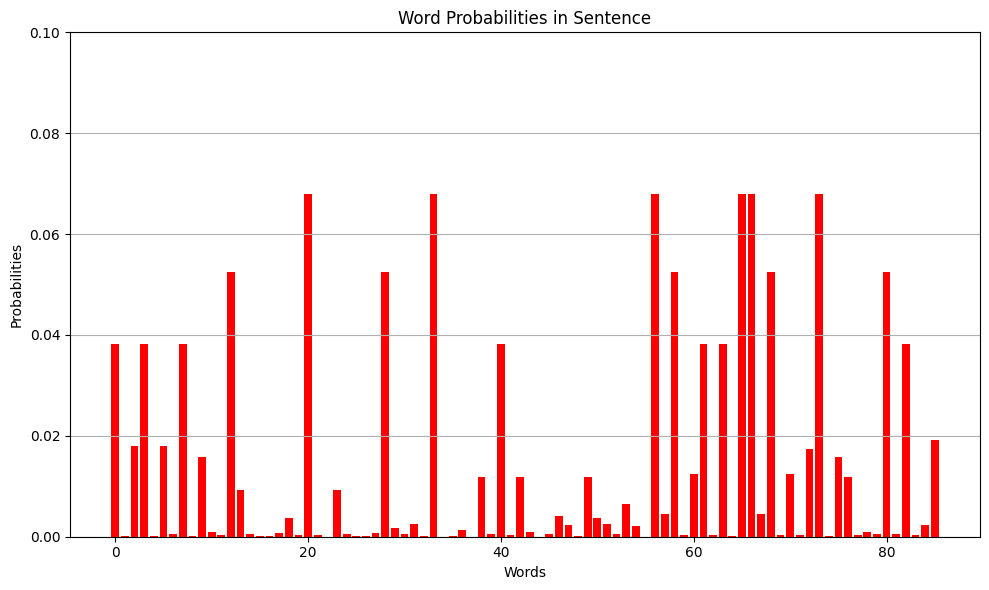

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(word_array, probability_array1, color='red')
plt.xlabel('Words')
plt.ylabel('Probabilities')
plt.title('Word Probabilities in Sentence')
plt.ylim(0, 0.1)
plt.grid(axis='y')

plt.tight_layout()
plt.show()